<div>
Olá, Heury!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto está muito bom e possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Aplicação adequada de algoritmos de agrupamento
- Uso adequado de gráficos e estatísticas descritivas

Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
   
<br>
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**

</div

# PREDIÇÃO DE ROTATIVIDADE (CHURN) DE CLIENTES EM ACADEMIA

# 1 - INTRODUÇÃO

Este projeto tem como objetivo analisar dados de uma rede de academias e construir modelos para prever a rotatividade de clientes, além de identificar grupos com perfis semelhantes por meio de técnicas de agrupamento.

**Etapas:**
1. Análise Exploratória de Dados (EDA)
2. Construção de modelos de classificação
3. Agrupamento de clientes
4. Conclusões e recomendações estratégicas

In [1]:
#Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Carregando os dados
df = pd.read_csv('/datasets/gym_churn_us.csv')

#Imprimindo o tamanho dos dados
print(df.shape)

#Visualizando as 5 primeiras linhas
df.head()

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# 2 - ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

In [3]:
# Verificando valores ausentes
print(df.isnull().sum())

# Estatísticas gerais
print(df.describe())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000     

In [4]:
# Comparando clientes que ficaram vs saíram
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-block alert-info">
O conjunto de dados possui 14 colunas e 4000 registros.
A variável objetivo é 'Churn', representando se o cliente saiu (1) ou permaneceu (0) na academia.
Não foram encontrados valores ausentes. Todas as colunas estão completas.
<br>
<b>Idade (Age):</b> varia entre aproximadamente 18 e 41 anos, com média por volta de 29.<br>
<b>Lifetime (tempo desde o primeiro comparecimento):</b> entre 1 e 32 meses, indicando perfis de novatos e veteranos.<br>
<b>Avg_additional_charges_total:</b> varia bastante, de 0 até mais de 500 — alguns clientes gastam consideravelmente mais com produtos/serviços adicionais.<br>
<b>Avg_class_frequency_total vs Avg_class_frequency_current_month:</b> mostram variações na frequência histórica vs mês atual.<br>
<b>Contract_period e Month_to_end_contract</b> possuem dispersão ampla, indo de 1 a 12.
</div>



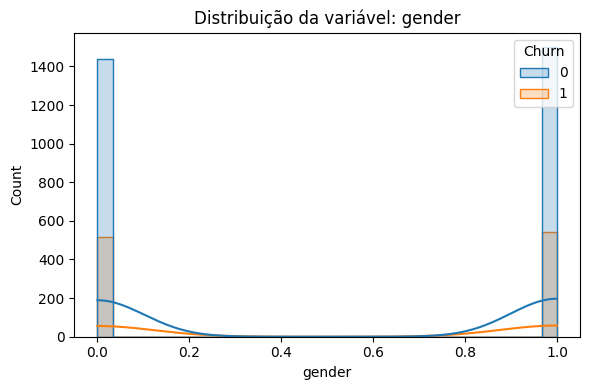

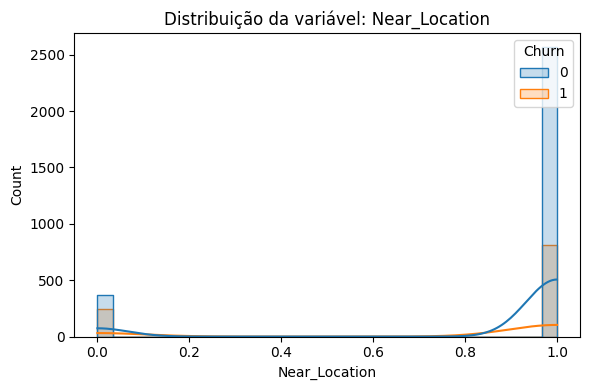

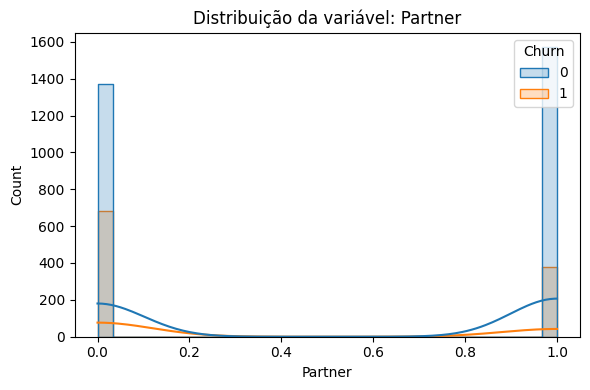

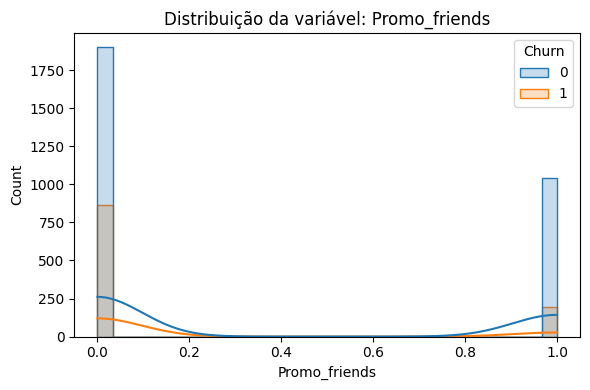

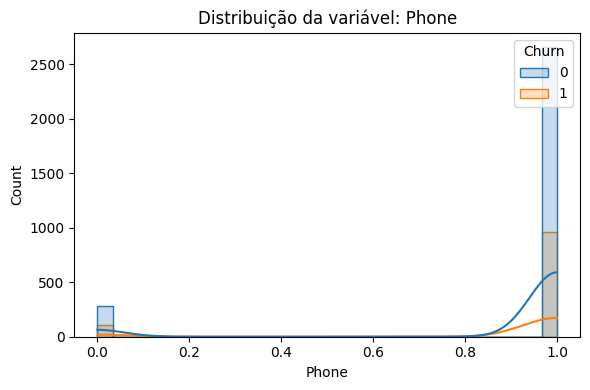

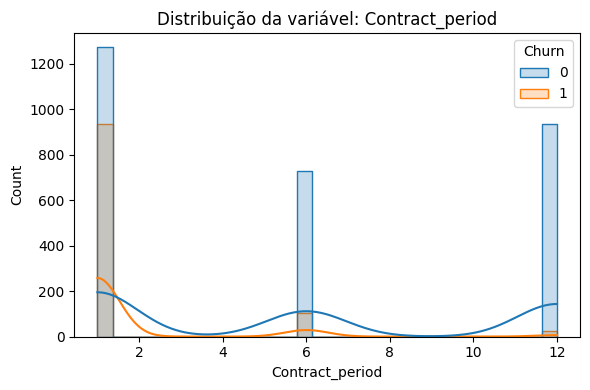

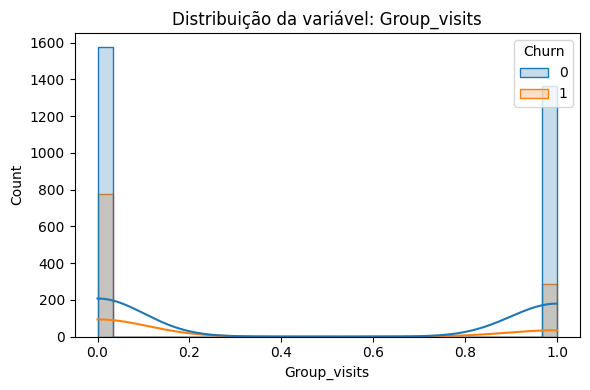

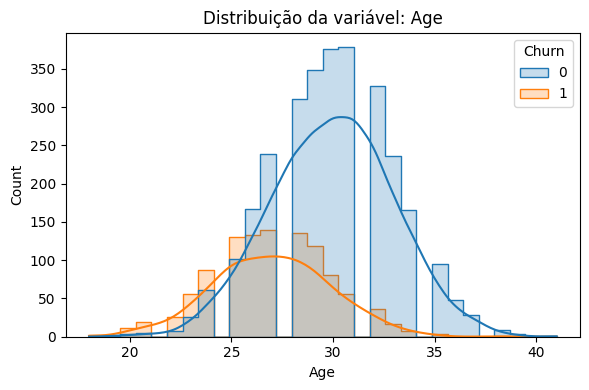

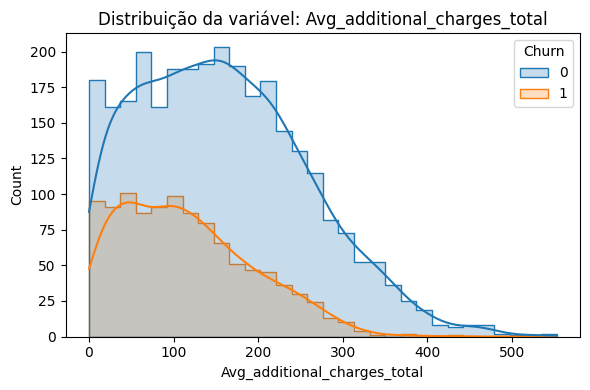

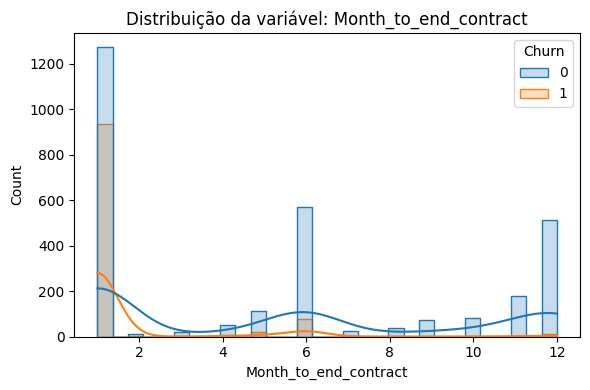

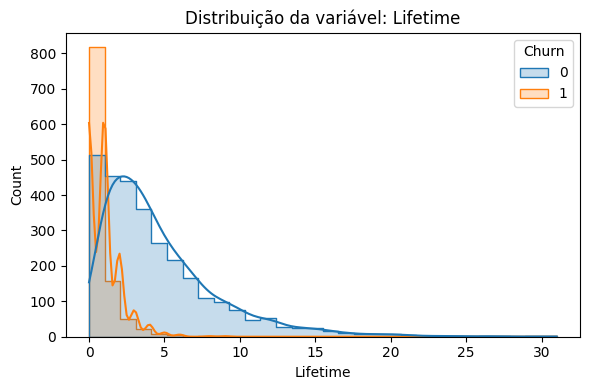

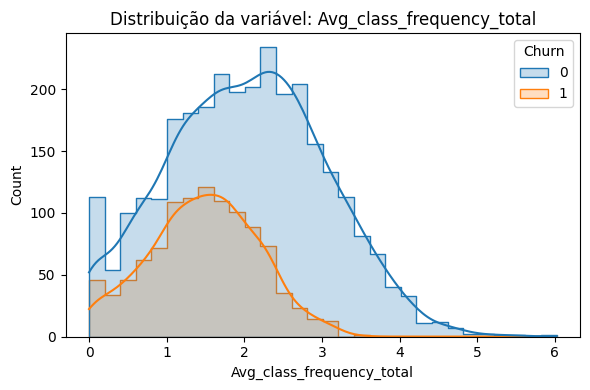

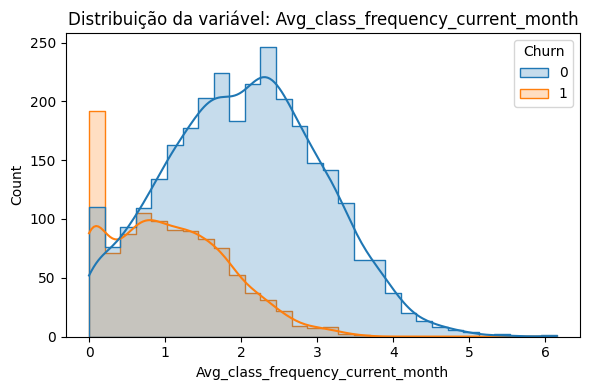

In [5]:
# Comparando as médias das variáveis entre clientes que saíram e que ficaram
mean_by_churn = df.groupby('Churn').mean()

# Histograma comparativo para cada feature
features_to_plot = df.drop('Churn', axis=1).columns
for col in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, element='step')
    plt.title(f'Distribuição da variável: {col}')
    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente
- Os imports foram feitos corretamente, porém considere executar os comandos em células separadas para isolar a execução do código
- O método `head()` foi usado para exibir uma amostra do conjunto de dados
- Sugestão: aqui você poderia converter os nomes das colunas para `lowercase`
</div>

<div class="alert alert-block alert-info"><b>Através da análise da média dos valores médios das características em dois grupos, podemos observar:</b>
- os contratos curtos têm mais churn (Contract_period);<br>
- clientes novos saem mais (Lifetime);<br>
- amigos ajudam na retenção (Promo_friends);<br>
- empresas parceiras fidelizam mais(Partner);<br>
- morar perto ajuda a permanecer (Near_Location);<br>
- participação em grupo reduz churn (Group_visits);<br>
- clientes que saem gastam menos (Avg_additional_charges_total).<br><br>
</div>
<div class="alert alert-block alert-info">
<b>Já o gênero e telefone têm médias semelhantes, indicando baixa influência direta sobre o churn.
Através dos histogramas, podemos observar padrões distintos:</b><br>
- clientes ativos tendem a ter contratos mais longos, mais visitas, mais tempo de relacionamento e maior envolvimento com serviços extras;<br>
- clientes churn têm forte concentração nos valores mínimos de contrato, tempo de vida e frequência.
</div>

<div class="alert alert-block alert-info">
<b>Principais correlações com Churn (negativas):</b><br>
Contract_period: -0.47<br>
Lifetime: -0.54<br>
Group_visits: -0.32<br>
Avg_class_frequency_current_month: -0.46<br>

<b>Essas variáveis são bons candidatos preditores para o modelo de classificação.</b>

</div>


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A distribuição das features para clientes que ficaram e clientes que saíram foram analisadas. Como sugestão, você poderia plotar as figuras lado a lado para facilitar a comparação das distribuições
- As conclusões foram apresentadas
</div>

# 3 - CONSTRUINDO UM MODELO PARA PREDIZER A ROTATIVIDADE DE CLIENTES

In [6]:
# Divindindo os dados em características(matriz X) e variável objetivo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Treinar modelo de Regressão Logística
log_model = LogisticRegression(max_iter=1000, random_state=0)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Treinando o modelo de Floresta Aleatória
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Criando uma função para avaliar as métricas
def avaliar_modelo(nome, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    return {
        "Modelo": nome,
        "Acurácia": round(acc, 3),
        "Precisão": round(prec, 3),
        "Sensibilidade (Recall)": round(rec, 3)
    }

resultados = [
    avaliar_modelo("Regressão Logística", y_test, log_pred),
    avaliar_modelo("Floresta Aleatória", y_test, rf_pred)
]

resultados_df = pd.DataFrame(resultados)

print("Comparação com random_state = 0")
print(resultados_df)

Comparação com random_state = 0
                Modelo  Acurácia  Precisão  Sensibilidade (Recall)
0  Regressão Logística     0.924     0.859                   0.828
1   Floresta Aleatória     0.916     0.839                   0.818


<div class="alert alert-block alert-info">
Podemos observar que a Regressão Logística superou a Floresta Aleatória em todas as métricas principais, o que a torna ligeiramente mais eficaz nesse caso.<br>
A sensibilidade (recall), crucial para detectar quem irá sair, ficou acima de 82% para os dois modelos, o que é excelente.</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os modelos Regressão Logística e Random Forest foram utilizados
- As métricas de performance dos modelos foram calculadas
- A acurácia de pelo menos `0.78` foi alcançada
</div>

# 4 - Criando agrupamentos de clientes

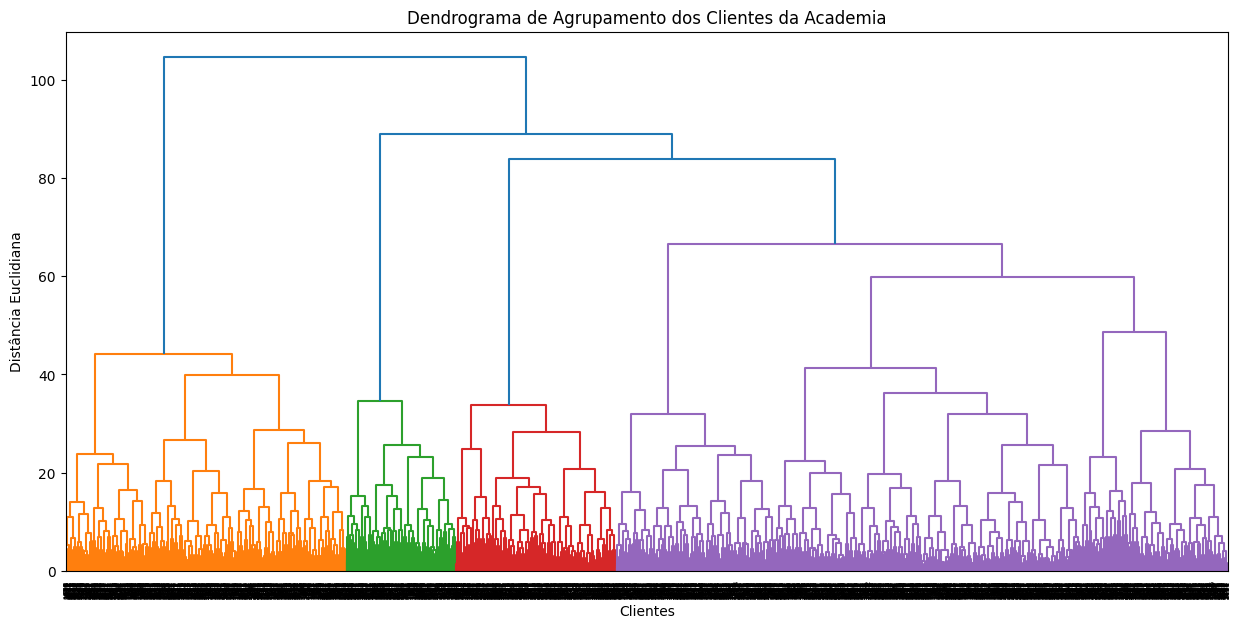

In [7]:
# Separando as features (excluindo 'Churn' para clustering)
X_clustering = df.drop('Churn', axis=1)

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Construindo matriz de linkage e dendrograma
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top')
plt.title('Dendrograma de Agrupamento dos Clientes da Academia')
plt.xlabel('Clientes')
plt.ylabel('Distância Euclidiana')
plt.show()


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram padronizados
- O agrupamento hierárquico foi executado
- O dendograma foi criado
- A função `linkage()` foi utilizada para construir a matriz de distâncias
</div>

In [8]:
# Treinando o modelo KMeans com n=5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Valores médios das características por cluster
cluster_means = df.groupby('cluster').mean()

# Taxa de churn por cluster
churn_por_cluster = df.groupby('cluster')['Churn'].mean().sort_values()
print("Médias por Cluster")
print(cluster_means)
print()
print("Taxa de Churn por Cluster:")
print(churn_por_cluster)

Médias por Cluster
           gender  Near_Location   Partner  Promo_friends     Phone  \
cluster                                                               
0        0.502970       0.959406  0.783168       0.574257  1.000000   
1        0.522078       0.862338  0.470130       0.306494  0.000000   
2        0.495050       0.000000  0.463366       0.079208  1.000000   
3        0.485737       1.000000  0.350238       0.240095  1.000000   
4        0.559666       0.976134  0.356802       0.230310  0.998807   

         Contract_period  Group_visits        Age  \
cluster                                             
0              10.889109      0.542574  29.982178   
1               4.787013      0.425974  29.301299   
2               2.352475      0.215842  28.477228   
3               1.948494      0.341521  28.167987   
4               2.669451      0.473747  30.125298   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                              

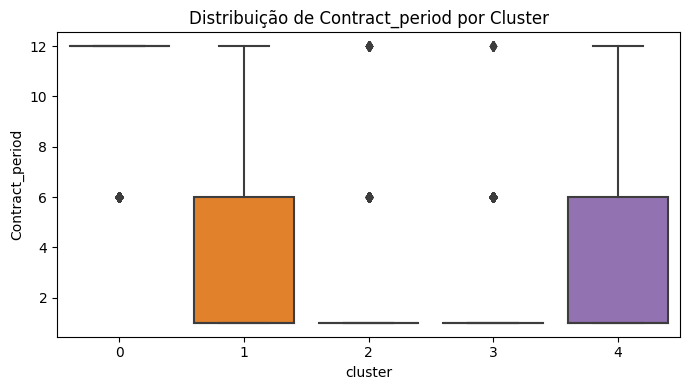

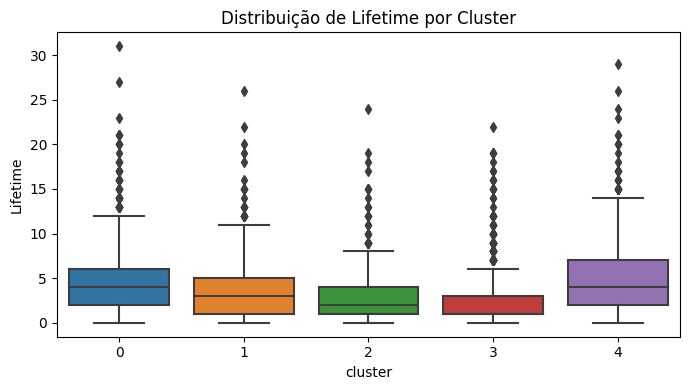

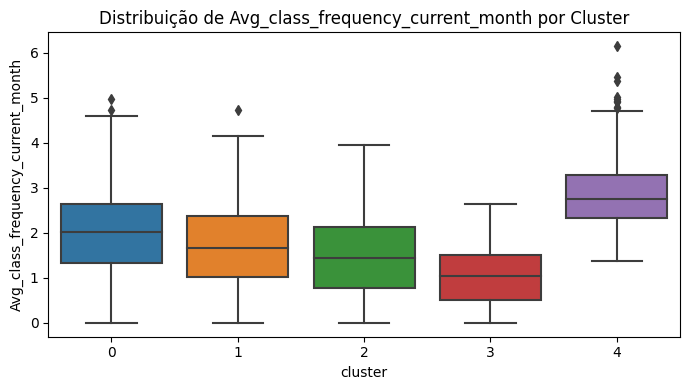

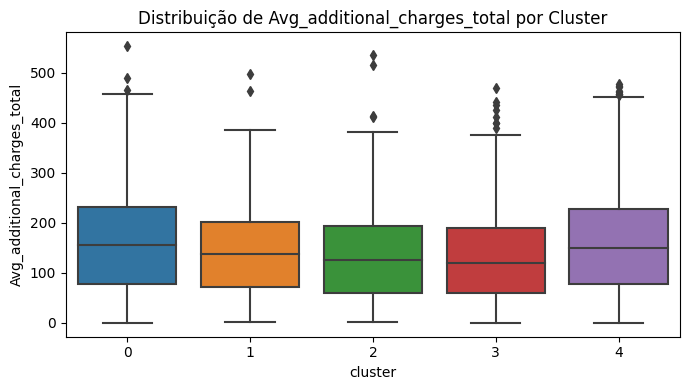

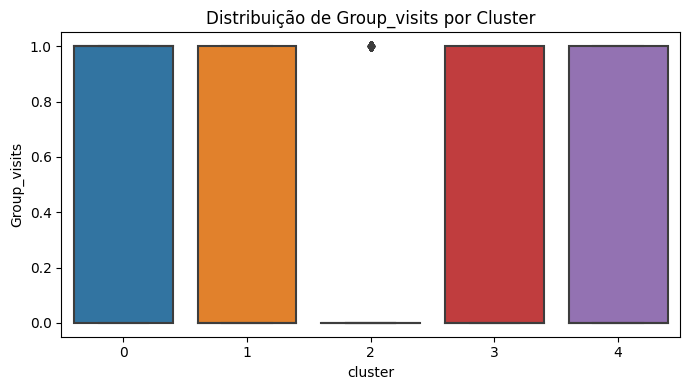

Taxa de Churn por Cluster:
cluster
0    0.027723
4    0.068019
1    0.267532
2    0.443564
3    0.514263
Name: Churn, dtype: float64


In [9]:
# Selecionando colunas para análise visual
cols_to_plot = [
    'Contract_period', 'Lifetime', 'Avg_class_frequency_current_month',
    'Avg_additional_charges_total', 'Group_visits'
]

# Gerando os boxplots para cada variável por cluster
for col in cols_to_plot:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x='cluster', y=col)
    plt.title(f'Distribuição de {col} por Cluster')
    plt.tight_layout()
    plt.show()

# Taxa de churn por cluster
churn_por_cluster = df.groupby('cluster')['Churn'].mean().sort_values()
print("Taxa de Churn por Cluster:")
print(churn_por_cluster)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A rotatividade média foi calculada por grupo (`cluster`)
</div>

<div class="alert alert-block alert-info">
<b>A partir das visualizações (valores médios das características por agrupamento), podemos verificar que:</b><br>
Alguns padrões se destacam de forma clara:<br>
<b>Cluster 0 tem:</b>
- Maior tempo de contrato (Contract_period)<br>
- Maior tempo como cliente (Lifetime)<br>
- Maior frequência de visitas<br>
- Maior gasto com serviços adicionais<br>
- Mais participação em grupos (Group_visits)<br>

Isso indica um grupo altamente engajado e conectado com a academia.<br>

<b>Cluster 3, por outro lado, mostra o oposto:</b><br>
- Contratos curtos</b><br>
- baixa frequência de visitas</b><br>
- baixíssimo gasto adicional</b><br>
- pouca ou nenhuma participação em grupos</b><br>
Esse perfil sugere desconexão com os serviços da academia.

Essas características são reflexo direto do comportamento de permanência ou saída, e sugerem onde a academia acerta (Cluster 0) e onde precisa melhorar (Cluster 3).</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os grupos foram gerados utilizando K-means
- Os clusters foram analisados e as observações foram apresentadas
</div>

<div class="alert alert-block alert-info">
<b>Nas distribuições de características por agrupamento, os boxplots revelaram diferenças claras na dispersão e nos padrões médios:</b><br>
Clientes dos clusters 0 e 4 têm distribuições mais concentradas em altos valores:<br>
- Frequência de visitas altas e consistentes;<br>
- contratos longos;<br>
- gastos adicionais regulares;<br>
- participação em grupo constante.<br>
<br>
<b>Já clusters 2 e 3 têm distribuições concentradas em baixos valores:</b><br>
- Frequência semanal próxima de 0;<br>
- contratos e lifetime baixos;<br>
- praticamente nenhum gasto extra;<br>
Esse padrão indica que engajamento e fidelização se refletem em várias métricas simultaneamente e não apenas no tempo de contrato.<br>
<b>Ainda podemos perceber que os agrupamentos diferem substancialmente:</b><br>
- Clusters 0 e 4 devem ser preservados com benefícios e atenção são os mais fiéis.<br>
- Clusters 2 e 3 precisam de ações corretivas urgentes, como ofertas personalizadas, incentivo à frequência, aulas em grupo e acompanhamento personalizado.
</div>

# 5 - CONCLUSÕES E RECOMENDAÇÕES BÁSICAS

<div class="alert alert-block alert-info">
<b>Conclusões</b><br>
Clientes com maior engajamento (visitas frequentes, participação em grupo, uso de serviços adicionais) têm taxas de rotatividade muito baixas.<br>
Clientes novos, com contratos curtos e baixa frequência, são os mais propensos a abandonar a academia.<br>
A segmentação por clusters revelou grupos bem distintos, o que permite estratégias personalizadas.<br><br>

<b>Recomendações de Estratégia de Retenção</b><br>
1 - Incentivar visitas em grupo e programas de indicação<br>
Motivo: A participação em grupo e promoções com amigos estão fortemente ligadas à lealdade.<br>
Ação: Criar campanhas como "Traga um amigo e ganhe um mês grátis" ou "Desafio de grupos".<br>

2 - Personalizar a jornada dos clientes de risco<br>
Motivo: Clusters 2 e 3 têm alta evasão por baixa conexão.<br>
Ação: Enviar mensagens personalizadas, oferecer sessões gratuitas com personal trainer ou aulas experimentais após 2 semanas de inatividade.<br>

3 - Recompensar o engajamento dos clientes fiéis<br>
Motivo: Clusters 0 e 4 são altamente leais e merecem valorização.<br>
Ação: Criar um programa de fidelidade com recompensas por frequência, aniversários de contrato e consumo adicional.<br>

4 - Oferecer upgrade de plano para clientes ativos<br>
Motivo: Clientes engajados são mais propensos a renovar ou expandir o contrato.<br>
Ação: Oferecer planos de 6 ou 12 meses com descontos exclusivos para quem já está frequentando regularmente.<br>

<b>Essas ações podem reduzir o churn, aumentar o LTV (valor do cliente ao longo do tempo) e reforçar a comunidade em torno da academia.</b></div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

As conclusões finais e recomendações foram apresentadas!
</div>